In [1]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=b51b6f806b82a6001441836f1677c6122e69ca970a4c443af49ec3ee5c196b07
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:

# imports
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np
import os
from tabulate import tabulate
from PIL import Image, ImageDraw
import face_recognition

RuntimeError: Error while calling cudaGetDevice(&the_device_id) in file /tmp/pip-install-y09r9_6r/dlib_c8b99aad161647cea8135f8a73554a12/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version

In [ ]:
face_recognition.api.face_encodings

Dataset: https://www.kaggle.com/datasets/zeinabartaill/presidents

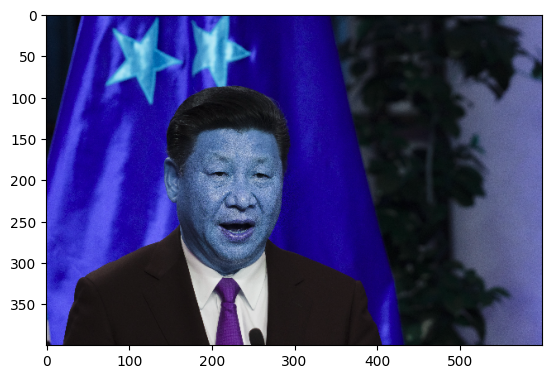

In [ ]:
img1 = cv2.imread("/content/drive/MyDrive/archive/train/China/XJ1.jpg")
resized_img = cv2.resize(img1, (0, 0), fx=0.2, fy=0.2) # reduce notebook size
plt.imshow(resized_img)

In [ ]:
%cd /content/drive/MyDrive/archive/train
!ls

/content/drive/MyDrive/archive/train
China  Germany	India  Japan  US


## Generate face encodings for all images

The dataset has different folders, each folder has images of the particular country.

Approach
- Iterate over all the images
- Store their image encodings
- Check for face similarrity with input images

In [ ]:
# path1 = "China/XJ1.jpg"
test = face_recognition.api.face_encodings(resized_img)
test

[array([-0.04763245,  0.10494832,  0.03299144,  0.01363382, -0.04785681,
        -0.04093091, -0.00885839, -0.23598647,  0.11644437, -0.11287683,
         0.20538932, -0.10619977, -0.2127457 , -0.12995751,  0.04173234,
         0.217271  , -0.20870848, -0.16722569, -0.08415452, -0.03787658,
        -0.02313966, -0.03112503,  0.04769937, -0.03292184, -0.00166161,
        -0.35453045, -0.08462194, -0.08409581,  0.08087339, -0.00134571,
        -0.03288615,  0.05476017, -0.20444298, -0.10926518,  0.06673516,
         0.10446785, -0.033499  , -0.0567537 ,  0.18381938, -0.07044175,
        -0.17851298,  0.03677088,  0.04870597,  0.19096833,  0.15941811,
         0.05711976,  0.03166612, -0.17053068,  0.14106423, -0.13318591,
        -0.02401166,  0.11143301,  0.09593868,  0.06809463,  0.00992017,
        -0.0947105 ,  0.03120852,  0.07229745, -0.14894608, -0.01705588,
         0.15147375, -0.02790675, -0.03348487, -0.06513779,  0.21599403,
         0.04132752, -0.09120549, -0.13662247,  0.1

In [ ]:
test = np.array(test)
test.shape

(1, 128)

In [ ]:
bounding_box = face_recognition.api.batch_face_locations([resized_img]) # expects an array
bounding_box

[[(158, 289, 276, 171)]]

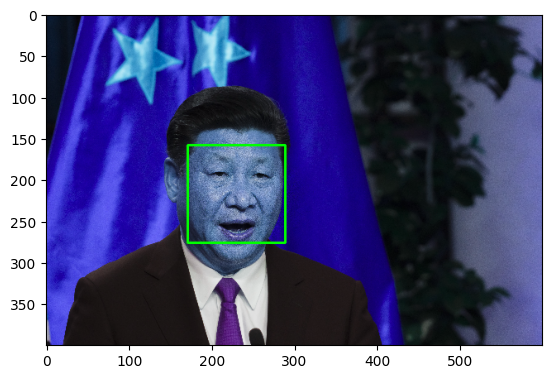

In [ ]:
top, right, bottom, left = bounding_box[0][0]

cv2.rectangle(resized_img, (left, top), (right, bottom), (0, 255, 0), 2)  # color code for green
plt.imshow(resized_img)

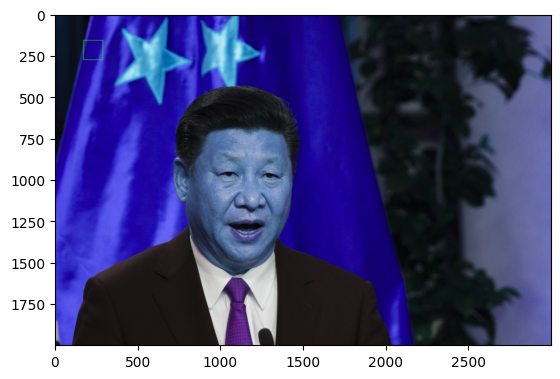

In [ ]:
temp_img = img1
cv2.rectangle(temp_img, (left, top), (right, bottom), (0, 255, 0), 2)  # color code for green
plt.imshow(temp_img)

So the rectangle returned from face encodings are positions in the  resized image, and not the actual image !

Lets try encoding all the faces now

In [ ]:
!ls

China  Germany	India  Japan  US


In [ ]:
root_directory = os.getcwd()

images_dict = {}
images_imread = []

for folder in os.listdir(root_directory):
    folder_path = os.path.join(root_directory, folder)
    if os.path.isdir(folder_path):
        images = []
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            image = cv2.imread(image_path)
            images_imread.append(images_imread)
            if image is not None:
                images.append(image)
        images_dict[folder] = images



In [ ]:
images_dict.keys(), len(images_imread)

(dict_keys(['Germany', 'Japan', 'US', 'India', 'China']), 50)

In [ ]:
images_encodings = face_recognition.api.batch_face_locations(images_imread)
images_encodings = np.array(images_encodings)
images_encodings.shape